# **The Power of TPOT: Transforming Machine Learning with Automated Model Optimization**

The traditional process of building a machine learning model often requires significant time and effort, as it involves a lot of experimentation, parameter tuning, and selecting appropriate techniques. 

By using genetic algorithms, TPOT automates the process of searching for the best combination of features, models, and parameters, allowing data scientists to focus more on interpreting results rather than setting up experiments. Thus, TPOT helps save time and effort, increase efficiency, and make the machine learning model development process more accessible to a wide range of audiences.

Author by: `'N Khadijah Nasution`'

<a> Data Scientist / Article Writer

---

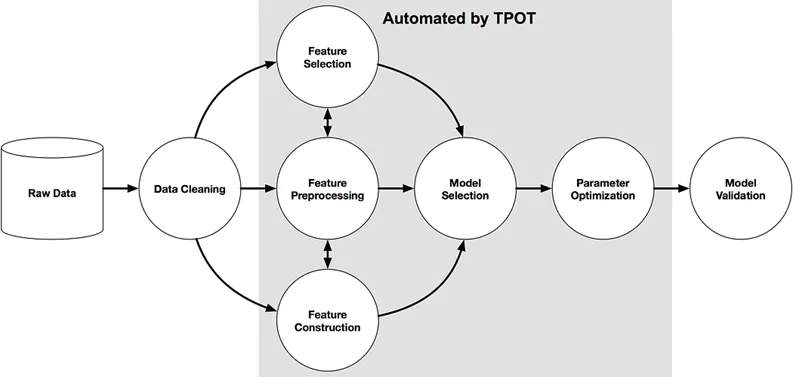

The following is a simple and easy to understand explanation of the workflow shown in the diagram:

Raw Data: Raw data that has not been processed.
Data Cleaning: Cleans raw data from errors, missing data, or anomalies so that the data is ready for use.

`Automatic by TPOT:`

Feature Selection: TPOT selects the most important features from the data, so only relevant data is used.

Feature Preprocessing: TPOT converts selected features into a format suitable for use by machine learning models, such as data normalization or rescaling.

Feature Construction: TPOT can create new features from existing features to add information that can be used by the model.

Model Selection: TPOT tries various machine learning algorithms and chooses the best one for the data.

Parameter Optimization: TPOT adjusts the selected model parameters for maximum performance.

Model Validation: Checking the performance of an optimized model with new data to ensure the model can perform well on data it has never seen before.

# Implementation TPOT

## Import Library

In [1]:
# instalation
# pip install tpot

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from tpot import TPOTRegressor

import warnings
warnings.filterwarnings("ignore")

c:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\USER\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


## Classification

In [3]:
# Load dataset
data = pd.read_csv('Employee.csv')
data


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
# Identifikasi kolom dengan nilai string
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None


In [5]:
# Melakukan encoding 
data = pd.get_dummies(data, columns=['City','Gender','EverBenched','Education'])

Catatan:
- proses mengubah variabel kategori menjadi bentuk numerik agar dapat diproses oleh algoritma machine learning

In [6]:
# Memisahkan fitur dan target
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [7]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [8]:
# Menginisialisasi TPOTClassifier
tpot = TPOTClassifier(verbosity=2, 
                      generations=5, 
                      population_size=20, 
                      random_state=42)

# Train TPOTClassifier
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8441675687378221

Generation 2 - Current best internal CV score: 0.8441675687378221

Generation 3 - Current best internal CV score: 0.8455109331024031

Generation 4 - Current best internal CV score: 0.8455120155877897

Generation 5 - Current best internal CV score: 0.847393375189435

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.7500000000000001, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

Interpretasi output:

- Generasi 1 — Generasi 5:
Hal ini menunjukkan perkembangan skor validasi cross-validation (CV) dari generasi ke generasi.

- Generasi pertama dan kedua mempunyai skor yang sama yaitu 0.8441675687378221.
- Pada generasi ketiga, skornya sedikit meningkat menjadi 0,8455109331024031.
- Generasi keempat mengalami peningkatan kecil lagi menjadi 0,8455120155877897.
- Generasi kelima memperoleh nilai terbaik yaitu 0.847393375189435.

- Pipeline Terbaik:
Algoritma terbaik yang ditemukan adalah XGBClassifier (Extreme Gradient Boosting).
- Parameter yang digunakan untuk model terbaik ini adalah:
learning_rate=0,1, max_ depth=9, min_child_weight=17 ,n_estimators=100, n_jobs=1, subsample=0,7500000000000001, verbositas=0


In [9]:
# Mengevaluasi model terbaik yang ditemukan oleh TPOT pada test set
accuracy = tpot.score(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.8818474758324383


Insight:

Akurasi model terbaik pada data pengujian sebesar 0.8818474758324383 atau sekitar 88.18%.

In [10]:
# Mengekspor pipeline terbaik yang ditemukan oleh TPOT
tpot.export('tpot_employee_pipeline.py')

## Regressi

In [11]:
# Memuat dataset dari file CSV
data_reg = pd.read_csv('data_saudi_used_cars.csv').drop(columns=['Negotiable','Region','Origin'])

In [12]:
data_reg = data_reg.drop(data_reg[data_reg['Price'] < 5000].index)
data_reg = data_reg.drop(data_reg[data_reg['Year'] < 2000].index)

In [13]:
data_reg = data_reg.drop_duplicates()

data yang duplikat akan dihapus sehingga tidak ada data yang berulang.

In [14]:
# Identifikasi kolom dengan nilai string
print(data_reg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3683 entries, 1 to 5622
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3683 non-null   object 
 1   Make         3683 non-null   object 
 2   Gear_Type    3683 non-null   object 
 3   Options      3683 non-null   object 
 4   Year         3683 non-null   int64  
 5   Engine_Size  3683 non-null   float64
 6   Mileage      3683 non-null   int64  
 7   Price        3683 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 259.0+ KB
None


In [15]:
# Melakukan one-hot encoding 
data_reg = pd.get_dummies(data_reg, columns=['Type','Make','Gear_Type','Options'])

In [16]:
# Memisahkan fitur dan target
X = data_reg.drop('Price',axis=1)
y = data_reg['Price']

In [17]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [18]:
# Menginisialisasi TPOTRegressor
tpot_reg = TPOTRegressor(verbosity=2, 
                         generations=4, 
                         population_size=20, 
                         random_state=42)

In [19]:
# Train TPOTRegressor
tpot_reg.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1251025929.1494842

Generation 2 - Current best internal CV score: -1251025929.1494842

Generation 3 - Current best internal CV score: -814482679.9190468

Generation 4 - Current best internal CV score: -790874298.4465592

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=7, min_samples_split=13, n_estimators=100)


TPOTRegressor(generations=4, population_size=20, random_state=42, verbosity=2)

Interpretasi Output:

- Generasi 1 — Generasi 4:
Hal ini menunjukkan perkembangan skor validasi cross-validation (CV) dari generasi ke generasi.

- Generasi 1:
Skor terbaik dari validasi silang internal: -1,251,025,929.1494842

- Generasi 2:
Skor terbaik dari validasi silang internal: -1,251,025,929.1494842
Tidak ada peningkatan dari Generasi 1 ke Generasi 2, skornya tetap sama.

- Generasi 3:
Skor terbaik dari validasi silang internal: -814,482,679.9190468
Terdapat peningkatan yang signifikan dibandingkan Generasi 2, dengan penurunan nilai negatif yang cukup besar.

- Generasi 4:
Skor terbaik dari validasi silang internal: -790,874,298.4465592
Ada sedikit peningkatan dibandingkan Generasi 3, dengan penurunan nilai negatif lebih lanjut.

- Pipeline Terbaik:
Model terbaik yang dipilih adalah RandomForestRegressor dengan parameter sebagai berikut:
Penggunaan model RidgeCV sebagai masukan
bootstrap=Benar, max_features=0,65, min_samples_leaf=7, min_samples_split=13, n_estimators=100

In [21]:
# Mengevaluasi model terbaik yang ditemukan oleh TPOT pada test set
mse = tpot_reg.score(X_test, y_test)
print(f'Test Mean Squared Error: {mse}')

Test Mean Squared Error: -1048685466.3055532


Insight:

Mean Squared Error (MSE) pada Data Uji:

MSE score : -1.048.685.466.3055532

Nilai MSE ini menunjukkan rata-rata kuadrat kesalahan prediksi pada data uji. Nilai negatif dalam konteks ini biasanya menunjukkan bahwa skor yang diberikan merupakan logaritma dari nilai positif sebenarnya, atau karena kesalahan skala atau tanda perhitungan. Namun, dalam praktik umum, MSE tidak boleh negatif.

In [ ]:
# Mengekspor pipeline terbaik yang ditemukan oleh TPOT
tpot.export('tpot_car_price_pipeline.py')

## Conclusion

1. Automation of Model Selection and Hyperparameter Tuning
    genetic algorithm to automatically select models and optimize hyperparameters, thereby reducing the need for model selection
    manual which can be time consuming and requires in-depth expertise machine learning.

2. Flexibility for Various Machine Learning Tasks
    • Classification: TPOTClassifier is used for classification tasks, where targets are discrete categories or labels.
    • Regression: TPORegressor is used for regression tasks, where target is a continuous value.
    
3. Best Export Pipeline
    TPOT exports the best pipeline found during the evolution process to in Python files. This pipeline can be run directly or
    integrated into other projects. This makes reuse easier and deployment of optimized models.

##  Recommendation

1. Review and Validation
    • Review the pipeline exported by TPOT to understand the preprocessing steps, models selected, and hyperparameters used.
    • if possible, set aside completely independent holdout sets for final model evaluation.

2. Evaluate with Various Metrics
    • Classification: Use additional metrics besides accuracy, such as precision, recall, F1-score, and AUC-ROC, to get a complete picture of the model’s performance.
    • Regression: Use additional metrics such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) other than R².
    
3. Test the model on the new dataset
    To ensure generalizability and run the model in real-world scenarios whenever possible. Consider manual fine-tuning and ensembling techniques to improve model performance.

## `'Thank for Reading, Good luck!'`